In [3]:
import pandas as pd
df = pd.read_csv('canada_per_capita_income.csv')
print(df.head())


   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583


   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583
Index(['year', 'per capita income (US$)'], dtype='object')


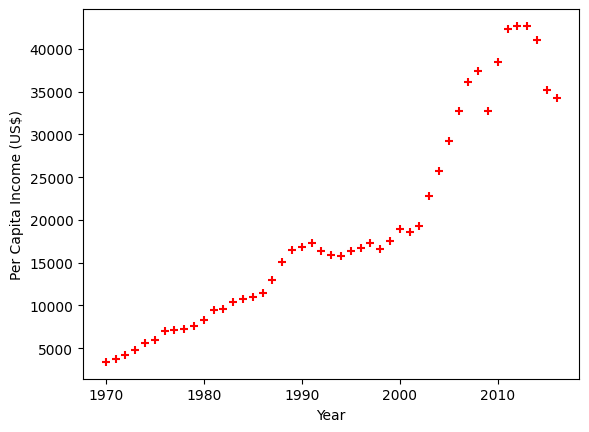

Coefficient (m): 828.4650752227104
Intercept (b): -1632210.7578554575
Predicted per capita income for 2020: $41288.69
Manual prediction for 2020: $41288.69


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Load the dataset (make sure to replace with the correct file path)
df = pd.read_csv('canada_per_capita_income.csv')

# Inspect the data to understand its structure
print(df.head())

# Make sure the column names are correct
# The dataset should have 'year' and 'per capita income (US$)' columns
# Check the column names
print(df.columns)

# Plotting the data
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.scatter(df['year'], df['per capita income (US$)'], color='red', marker='+')
plt.show()

# Preparing the data for linear regression
X = df[['year']]  # Feature: Year
y = df['per capita income (US$)']  # Target: Per Capita Income

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model
reg.fit(X, y)

# Check the model's coefficients and intercept
print(f"Coefficient (m): {reg.coef_[0]}")
print(f"Intercept (b): {reg.intercept_}")

# Predict the per capita income for the year 2020
predicted_income_2020 = reg.predict([[2020]])
print(f"Predicted per capita income for 2020: ${predicted_income_2020[0]:.2f}")

# Optionally, calculate manually using the equation Y = m*X + b
manual_prediction = 2020 * reg.coef_[0] + reg.intercept_
print(f"Manual prediction for 2020: ${manual_prediction:.2f}")



In [6]:
import pandas as pd
df = pd.read_csv('salary.csv')
print(df.head())


   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
Index(['YearsExperience', 'Salary'], dtype='object')


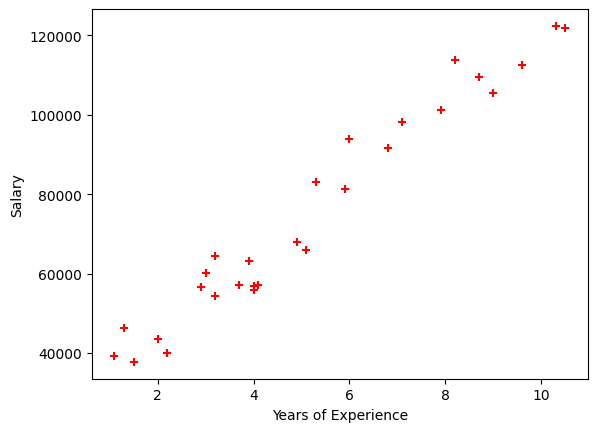

Coefficient (m): 9398.640601843543
Intercept (b): 26265.98773185531
Predicted salary for an employee with 12 years of experience: $139049.67


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('salary.csv')

# Inspect the data to ensure correct loading
print(df.head())  # View the first few rows of the dataset
print(df.columns)  # Check the column names

# Step 2: Drop rows with NaN values
df = df.dropna()

# Step 3: Preprocess the data
df.columns = ['experience', 'salary']  # Rename columns for clarity

# Step 4: Plot the data (optional)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(df['experience'], df['salary'], color='red', marker='+')
plt.show()

# Step 5: Prepare the data for regression
X = df[['experience']]  # Feature: Years of experience
y = df['salary']  # Target: Salary

# Step 6: Create and train the linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Step 7: Check the model's coefficients and intercept
print(f"Coefficient (m): {reg.coef_[0]}")
print(f"Intercept (b): {reg.intercept_}")

# Step 8: Predict the salary for an employee with 12 years of experience
predicted_salary_12_years = reg.predict([[12]])  # Predict salary for 12 years of experience
print(f"Predicted salary for an employee with 12 years of experience: ${predicted_salary_12_years[0]:.2f}")



In [11]:
import pandas as pd
df = pd.read_csv('hiring.csv')
print(df.head())


  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000


In [12]:
import pandas as pd
df = pd.read_csv('1000_Companies.csv')
print(df.head())


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [17]:
import pandas as pd
import numpy as np
from sklearn import linear_model

# Step 1: Load the hiring dataset
df_hiring = pd.read_csv('hiring.csv')

# Check the first few rows of the dataset
print(df_hiring.head())

# Step 2: Convert experience from words to numbers
experience_mapping = {
    'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
    'eleven': 11, 'twelve': 12
}

# Convert 'experience' column from words to numbers
df_hiring['experience'] = df_hiring['experience'].replace(experience_mapping)

# Step 3: Handle missing values in the 'experience' column
# Fill NaN values in 'experience' column with the median
df_hiring['experience'] = df_hiring['experience'].fillna(df_hiring['experience'].median())

# Step 4: Handle missing values in other columns (test_score and interview_score)
# Fill NaN values with the median or drop rows with NaN values
df_hiring = df_hiring.dropna()  # Drop rows that contain NaN values in any column

# Step 5: Prepare the data for regression
X_hiring = df_hiring[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]  # Features
y_hiring = df_hiring['salary($)']  # Target variable: Salary

# Step 6: Create and train the regression model
reg_hiring = linear_model.LinearRegression()
reg_hiring.fit(X_hiring, y_hiring)

# Step 7: Model coefficients and intercept
print(f"Model Coefficients: {reg_hiring.coef_}")
print(f"Model Intercept: {reg_hiring.intercept_}")

# Step 8: Predict salaries for new candidates
# Candidate 1: 2 years experience, 9 test score, 6 interview score
prediction_1 = reg_hiring.predict([[2, 9, 6]])
print(f"Predicted salary for Candidate 1: ${prediction_1[0]:.2f}")

# Candidate 2: 12 years experience, 10 test score, 10 interview score
prediction_2 = reg_hiring.predict([[12, 10, 10]])
print(f"Predicted salary for Candidate 2: ${prediction_2[0]:.2f}")



  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
Model Coefficients: [2728.67637903 1268.58423609 2910.72095629]
Model Intercept: 12868.634043083053
Predicted salary for Candidate 1: $47207.57
Predicted salary for Candidate 2: $87405.80


<ipython-input-17-963741cc0859>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_hiring['experience'] = df_hiring['experience'].replace(experience_mapping)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the companies dataset
df_companies = pd.read_csv('1000_Companies.csv')

# Check the data to understand its structure
print(df_companies.head())

# Step 2: Preprocess the 'State' column (encode categorical values)
label_encoder = LabelEncoder()
df_companies['State'] = label_encoder.fit_transform(df_companies['State'])

# Handle missing values if there are any
df_companies = df_companies.dropna()

# Step 3: Prepare the data for regression
X_companies = df_companies[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]  # Features
y_companies = df_companies['Profit']  # Target variable: Profit

# Step 4: Create and train the regression model
reg_companies = linear_model.LinearRegression()
reg_companies.fit(X_companies, y_companies)

# Step 5: Model coefficients and intercept
print(f"Model Coefficients: {reg_companies.coef_}")
print(f"Model Intercept: {reg_companies.intercept_}")

# Step 6: Predict profit for a new company
# New company data: 91694.48 R&D Spend, 515841.3 Administration, 11931.24 Marketing Spend, Florida State
new_company_data = np.array([[91694.48, 515841.3, 11931.24, label_encoder.transform(['Florida'])[0]]])
predicted_profit = reg_companies.predict(new_company_data)
print(f"Predicted profit for the new company: ${predicted_profit[0]:.2f}")


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
Model Coefficients: [ 0.55389023  1.02672443  0.08058525 46.62387015]
Model Intercept: -70214.44175560221
Predicted profit for the new company: $511209.20


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
